# Ejercicios de carga de datos textuales

1. Accede a un artículo del sitio web Psychology Today y extrae el contenido textual. Presenta solo el texto relevante al artículo.

In [48]:
# Escribe tu respuesta aquí
from urllib.request import urlopen
from urllib.request import Request
from bs4 import BeautifulSoup

# Get html
url = "https://www.psychologytoday.com/us/blog/between-cultures/202205/the-psychologically-rich-life"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 6.1; WOW64; rv:23.0) Gecko/20100101 Firefox/23.0"
}
req = Request(url=url, headers=headers)
html = urlopen(req).read()

# Parse html
soup = BeautifulSoup(html)
raw = soup.get_text(strip=True)

# Select relevant portion of text
fragment = raw[1726:10286]
fragment

'The Psychologically Rich LifeBeyond, or beside, meaningfulness and happiness is psychological richness.Posted May 26, 2022|Reviewed by Kaja PerinaShareTweetEmailKey pointsThe psychologically rich life differs from the existing hedonic-eudaimonic dichotomy in a number of ways.The psychologically rich life comprises novel, complex and interesting experiences that lead to changes in perspective.The stories that we accumulate and share with others are the currency of our psychological wealth.Instructions for living a life.Payattention.Be astonished.Tell about it.Mary OliverPsychologist Shige Oishi had been studyinghappinessfor 20 years, when one summer, he decided to pause and take stock of the wealth of accumulated research. Among his biggest insights was the role our connections with others played in the quality of our lives. The science was equally clear: although well-being had many renditions,the good life– the one common elusive aspiration that humans around the world shared – follo

[nltk_data] Downloading package punkt to /home/renato/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


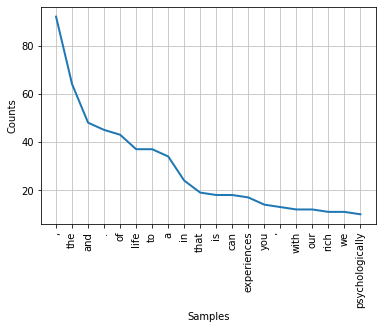

In [49]:
import nltk

nltk.download("punkt")

# Get tokens
tokens = nltk.word_tokenize(fragment)

# Create text object
text = nltk.Text(tokens)

# Plot most frequent words
text.plot(20)

2. Utiliza el API de Twitter para extraer 200 tweets de un hashtag de tu interés. Almacena tus resultados en un DataFrame de Pandas y asegúrate de no incluir valores repetidos. 

In [11]:
# Escribe tu respuesta aquí
import tweepy

# Authenticate
consumerKey = "TYPE HERE"
consumerSecret = "TYPE HERE"
accessToken = "TYPE HERE"
accessTokenSecret = "TYPE HERE"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [12]:
import pandas as pd

# Get tweets
keyword = "#JohnnyDeppIsInnocent"
noOfTweet = 200
tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)

# Put tweets in list
tweet_list = []
for tweet in tweets:
    tweet_list.append(tweet.text)

# Put tweets in Data Frame and drop duplicates
tweet_list = pd.DataFrame(tweet_list)
tweet_list.drop_duplicates(inplace=True)
tweet_list

,0
0,RT @june_cooper: #JohnnyDeppIsInnocent\n\n#Jus...
1,RT @mony1117: Estos abogados!!👏🏽 💪🏽👊🏽👌🏽❤ esto ...
2,"RT @nuggin: To Johnny Depp,\n\nYou were told t..."
3,RT @twiggywitch: Johnny solo buscaba decir la ...
4,RT @Shaniente12: I’m starting to question if A...
...,...
174,RT @Sangham99732471: I want to unanimously tha...
180,RT @Alejand01350761: Very emotional day. Johnn...
182,RT @iamthatBK: Rottenborn argued that just bec...
184,No one talk about how is she going to pay $50m...
